# STAT301 Group 21 Project (test) 

In [1]:
# packages <- c("broom", "latex2exp", "tidymodels", "repr", "gridExtra", "faraway", 
#               "mltools", "leaps", "glmnet", "tidyverse", "modelr", "infer", "GGally", "patchwork")

# install_if_missing <- function(packages) {
#   for (pkg in packages) {
#     if (!require(pkg, character.only = TRUE)) {
#       install.packages(pkg, dependencies = TRUE)
#     }
#   }
# }
# install_if_missing(packages)

library(broom)
library(latex2exp)
library(tidymodels)
library(repr)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(tidyverse)
library(modelr)
library(infer)
library(GGally)
library(tidyverse)
library(patchwork)
library(car)



── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ dials        1.2.1     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘mltools’


The following objects are masked from ‘package:yardstick’:

    mcc, rmse


The following object is masked from ‘package:tidyr’:


## Data Description
**Number of observations**: 34

**Number of variables**: 1470


### Summary of Variables
List below are all the variables included in the dataset, along with their types:

**Age**: Continuous Variable - Age of the employee.

**Attrition**: Categorical Variable - Whether the employee has left the company ("Yes" or "No").

**BusinessTravel**: Categorical Variable - Frequency of business travel (e.g., "Travel_Rarely", "Travel_Frequently").

**DailyRate**: Continuous Variable - Daily rate of the employee.

**Department**: Categorical Variable - Department where the employee works (e.g., "Sales", "Research & Development").

**DistanceFromHome**: Continuous Variable - Distance between employee’s residence and office.

**Education**: Continuous Variable - Level of education (values from 1 to 5).

**EducationField**: Categorical Variable - Field of education (e.g., "Life Sciences", "Medical").

**EmployeeCount**: Continuous Variable - Employee count (always 1, serves no purpose in modeling).

**EmployeeNumber**: Continuous Variable - Unique identifier for the employee.

**EnvironmentSatisfaction**: Continuous Variable - Level of satisfaction with the work environment (values from 1 to 4).

**Gender**: Categorical Variable - Gender of the employee ("Male" or "Female").

**HourlyRate**: Continuous Variable - Hourly rate of the employee.

**JobInvolvement**: Continuous Variable - Level of job involvement (values from 1 to 4).

**JobLevel**: Continuous Variable - Job level within the organization.

**JobRole**: Categorical Variable - Role of the employee (e.g., "Sales Executive", "Research Scientist").

**JobSatisfaction**: Continuous Variable - Job satisfaction level (values from 1 to 4).

**MaritalStatus**: Categorical Variable - Marital status of the employee (e.g., "Single", "Married").

**MonthlyIncome**: Continuous Variable - Monthly income of the employee.

**MonthlyRate**: Continuous Variable - Monthly rate of the employee.

**NumCompaniesWorked**: Continuous Variable - Number of companies the employee has worked for.

**Over18**: Categorical Variable - Whether the employee is over 18 (always "Yes").

**OverTime**: Categorical Variable - Whether the employee works overtime ("Yes" or "No").

**PercentSalaryHike**: Continuous Variable - Percentage increase in salary.

**PerformanceRating**: Continuous Variable - Performance rating (values from 1 to 4).

**RelationshipSatisfaction**: Continuous Variable - Satisfaction level with relationships at work (values from 1 to 4).

**StandardHours**: Continuous Variable - Standard hours worked (always 80).

**StockOptionLevel**: Continuous Variable - Stock option level (values from 0 to 3).

**TotalWorkingYears**: Continuous Variable - Total number of years the employee has worked.

**TrainingTimesLastYear**: Continuous Variable - Number of training sessions attended last year.

**WorkLifeBalance**: Continuous Variable - Work-life balance satisfaction (values from 1 to 4).

**YearsAtCompany**: Continuous Variable - Total years spent at the company.

**YearsInCurrentRole**: Continuous Variable - Number of years in the current role.

**YearsSinceLastPromotion**: Continuous Variable - Years since the last promotion.

**YearsWithCurrManager**: Continuous Variable - Years with the current manager.


In [7]:
HR_data <- read.csv('HR-Employee-Attrition.csv') %>% select(-Over18)
head(HR_data)
num_variables <- ncol(HR_data)
num_observations <- nrow(HR_data)
num_variables
num_observations
hr_split <- 
    HR_data %>%
    initial_split(prop = 0.7, strata = MonthlyIncome)

training_hr <- training(hr_split)
testing_hr <- testing(hr_split)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


[1] 34

[1] 1470

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2  linear dependencies found”


Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“number of items to replace is not a multiple of replacement length”


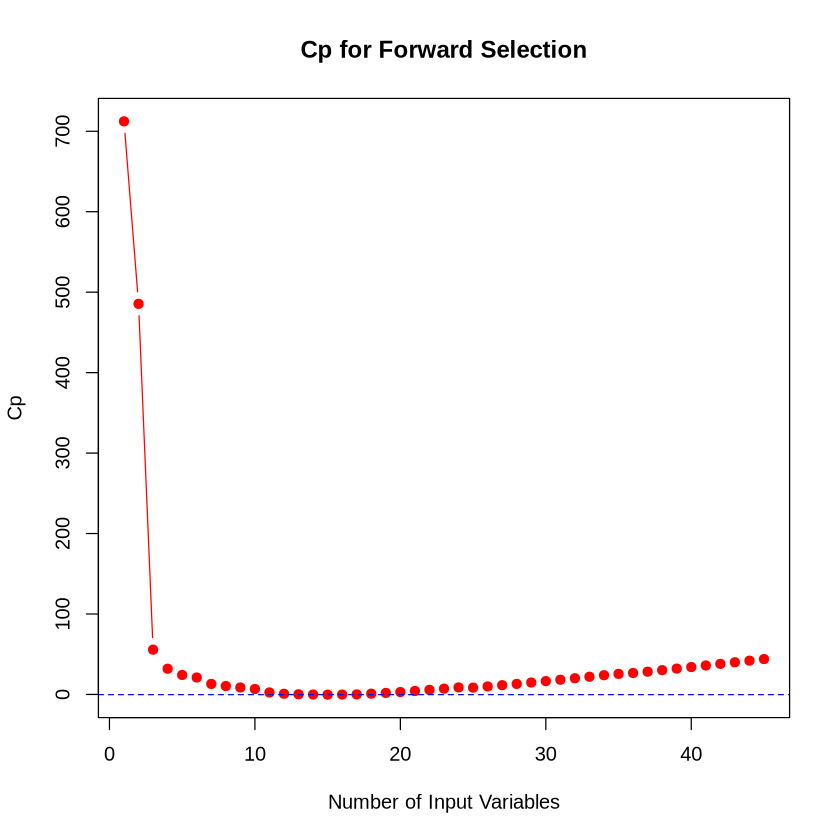

In [8]:
hr_forward_sel <- regsubsets(x = MonthlyIncome ~ ., nvmax = 45,
                                  data = training_hr,
                                  method = "forward")

hr_forward_summary <- summary(hr_forward_sel)
# hr_forward_summary
# hr_forward_summary_df <- tibble(
#     n_input_variables = 1:45,
#     RSQ = hr_forward_summary$rsq,
#     RSS = hr_forward_summary$rss,
#     ADJ_R2 = hr_forward_summary$adjr2,
#     Cp = hr_forward_summary$cp,
#     BIC = hr_forward_summary$bic,
# )
# hr_forward_summary_df

plot(
    summary(hr_forward_sel)$cp,
    main = "Cp for Forward Selection",
    xlab = "Number of Input Variables", 
    ylab = "Cp",
    type = "b",
    pch = 19,
    col = "red"
)
abline(h = min(summary(hr_forward_sel)$cp), col = "blue", lty = 2)

In [9]:
cp_min = which.min(hr_forward_summary$cp) 

selected_var <- names(coef(hr_forward_sel, cp_min))[-1]
selected_var

[1] "DistanceFromHome"              "EducationFieldOther"          
 [3] "EnvironmentSatisfaction"       "HourlyRate"                   
 [5] "JobLevel"                      "JobRoleHuman Resources"       
 [7] "JobRoleLaboratory Technician"  "JobRoleManager"               
 [9] "JobRoleManufacturing Director" "JobRoleResearch Scientist"    
[11] "JobRoleSales Executive"        "JobSatisfaction"              
[13] "WorkLifeBalance"               "EmployeeCount"                
[15] "StandardHours"

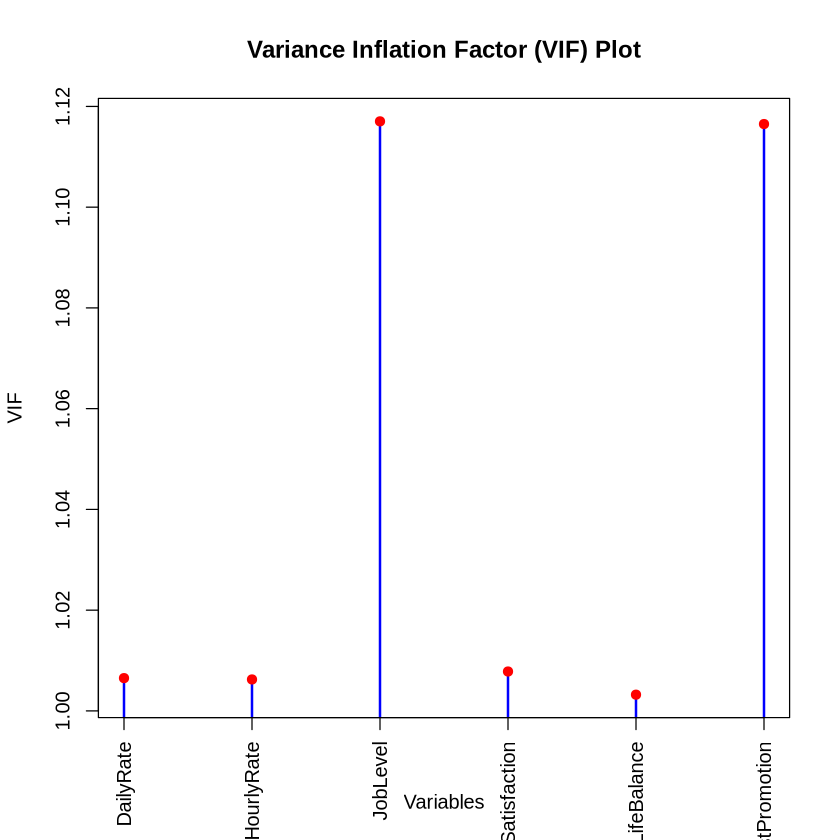

In [17]:
model1 <- lm(MonthlyIncome ~ DailyRate + HourlyRate + 
              JobLevel + JobSatisfaction + WorkLifeBalance + 
              YearsSinceLastPromotion, data = training_hr)
vif_values <- vif(model1)
vif_df <- data.frame(Variable = names(vif_values), VIF = vif_values)
plot(1:nrow(vif_df), vif_df$VIF, type = "h", lwd = 2, col = "blue",
     xlab = "Variables", ylab = "VIF", main = "Variance Inflation Factor (VIF) Plot",
     xaxt = "n")
axis(1, at = 1:nrow(vif_df), labels = vif_df$Variable, las = 2)
points(1:nrow(vif_df), vif_df$VIF, pch = 19, col = "red")
abline(h = 5, col = "darkgreen", lty = 2)

## The Question:
**Can we determine the monthly income of an employee based on certain characteristics of individuals at the company? If yes, can we quantify the relationship?**

The objective of this research question is to identify and analyze the impact of various demographic factors on the monthly income of employees. By understanding these influences, the company can determine if any demographic biases exist, and it can inform salary and compensation practices to ensure equity across different employee groups.